# Linear Regression

## Imports

In [1]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from sklearn import linear_model
from sklearn import preprocessing
import seaborn as sns; sns.set()

## Upload Data

In [2]:
archive = files.upload()

Saving dengue_features_test.csv to dengue_features_test.csv
Saving dengue_features_train.csv to dengue_features_train.csv
Saving dengue_labels_train.csv to dengue_labels_train.csv


In [3]:
df_features = pd.read_csv('dengue_features_train.csv', sep=',')
df_labels = pd.read_csv('dengue_labels_train.csv', sep=',')
train = pd.merge(df_features, df_labels, on=['city', 'year', 'weekofyear'])

train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [4]:
test = pd.read_csv('dengue_features_test.csv', sep=',')
test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


## Preprocessing Data

In [5]:
def remove_null_values(dataframe):
  if pd.isnull(dataframe).any().any():
    dataframe.fillna(method='ffill', inplace=True)

train.apply(remove_null_values)
test.apply(remove_null_values)

print(pd.isnull(train).any().any())
print(pd.isnull(test).any().any())

False
False


In [6]:
train.drop("week_start_date", axis=1, inplace=True)
test.drop("week_start_date", axis=1, inplace=True)

In [7]:
lb = preprocessing.LabelBinarizer()
train['city_bin'] = lb.fit_transform(train['city'])
test['city_bin'] = lb.fit_transform(test['city'])

## Linear Regression

### Both cities

#### Select Features

In [17]:
features = ['weekofyear','reanalysis_specific_humidity_g_per_kg','station_avg_temp_c','reanalysis_tdtr_k']

X_train = train[features]
X_test = test[features]
Y_train = train['total_cases']

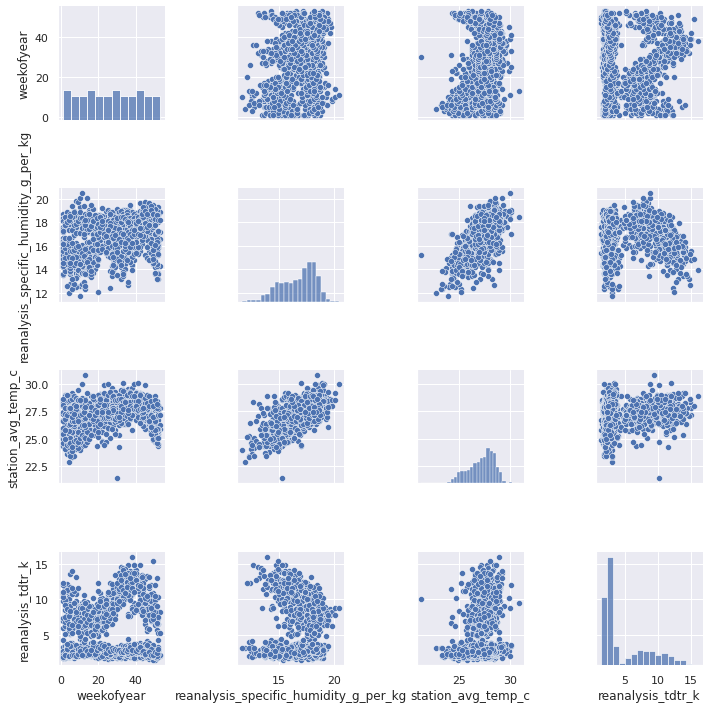

In [18]:
%matplotlib inline
sns.pairplot(train[features]);

#### Apply Algorithm

In [19]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})

,Feature,Coefficient
0,weekofyear,0.597123
1,reanalysis_specific_humidity_g_per_kg,-1.258076
2,station_avg_temp_c,4.784638
3,reanalysis_tdtr_k,-3.987188


In [20]:
Y_prediction = model.predict(X_test)

Y = np.rint(Y_prediction)
Y = Y.astype(int)
result = np.hstack(Y)

result

array([ 25,  25,  26,  29,  30,  35,  31,  34,  39,  40,  39,  42,  42,
        43,  41,  45,  45,  44,  44,  42,  41,  40,  44,  45,  40,  42,
        47,  46,  43,  44,  46,  42,  45,  48,  42,  12,  11,  18,  16,
        18,  15,  17,  17,  18,  20,  24,  21,  16,  22,  22,  25,  26,
        29,  27,  31,  30,  32,  33,  35,  37,  39,  41,  42,  43,  43,
        45,  47,  45,  45,  46,  48,  45,  46,  45,  48,  52,  51,  50,
        51,  49,  47,  45,  44,  45,  49,  48,  47,  48,  15,  11,  12,
        14,  16,  15,  14,  22,  20,  17,  20,  25,  26,  26,  24,  25,
        30,  31,  29,  34,  32,  35,  35,  37,  33,  33,  39,  41,  36,
        36,  41,  45,  39,  45,  41,  44,  44,  43,  42,  43,  43,  42,
        45,  47,  47,  40,  45,  45,  37,  40,  41,  46,  12,  12,  14,
        12,  13,  17,  18,  16,  18,  18,  20,  19,  21,  26,  24,  25,
        26,  27,  29,  30,  25,  33,  30,  34,  38,  39,  37,  40,  37,
        41,  40,  42,  43,  43,  40,  45,  47,  39,  44,  47,  4

#### Output

In [21]:
# generate output
output = pd.DataFrame({ 'city': test['city'], 'year': test['year'], 'weekofyear': test['weekofyear'], 'total_cases': result})

with open('result.csv', 'w') as f:
  output.to_csv(f,  index = False)
  

files.download('result.csv')

output.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,city,year,weekofyear,total_cases
0,sj,2008,18,25
1,sj,2008,19,25
2,sj,2008,20,26
3,sj,2008,21,29
4,sj,2008,22,30


### Divided By Cities

In [22]:
train_sj = train[train['city'] == 'sj']
train_iq = train[train['city'] == 'iq']

test_sj = test[test['city'] == 'sj']
test_iq = test[test['city'] == 'iq']

#### San Juan

##### Select Features

In [23]:
features_sj = ['weekofyear','station_min_temp_c','reanalysis_specific_humidity_g_per_kg']

X_train_sj = train_sj[features_sj]
X_test_sj = test_sj[features_sj]
Y_train_sj = train_sj['total_cases']

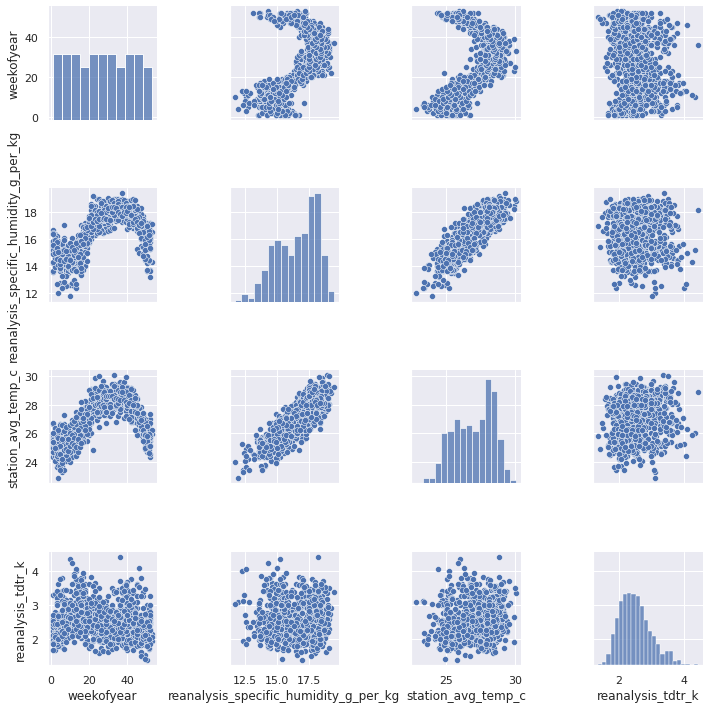

In [ ]:
%matplotlib inline
sns.pairplot(train_sj[features]);

##### Apply Algorithm

In [24]:
model_sj = linear_model.LinearRegression()
model_sj.fit(X_train_sj, Y_train_sj)

pd.DataFrame({'Feature': features_sj, 'Coefficient': model_sj.coef_})

,Feature,Coefficient
0,weekofyear,0.869083
1,station_min_temp_c,-0.828518
2,reanalysis_specific_humidity_g_per_kg,2.593672


In [25]:
Y_prediction_sj = model_sj.predict(X_test_sj)

Y_sj = np.rint(Y_prediction_sj)
Y_sj = Y_sj.astype(int)
result_sj = np.hstack(Y_sj)

result_sj

array([26, 26, 29, 26, 29, 29, 33, 34, 36, 36, 36, 36, 39, 39, 43, 43, 44,
       46, 47, 49, 48, 49, 51, 48, 50, 50, 49, 52, 52, 53, 52, 48, 50, 53,
       52,  8,  9, 11, 13, 15, 13, 13, 12, 14, 15, 14, 14, 17, 16, 19, 20,
       22, 24, 24, 27, 28, 33, 32, 32, 34, 34, 35, 38, 38, 40, 41, 40, 42,
       43, 43, 45, 48, 46, 47, 49, 49, 51, 52, 50, 50, 53, 54, 56, 54, 55,
       56, 55, 56, 12, 13, 15, 14, 12, 13, 16, 17, 21, 21, 20, 23, 21, 19,
       21, 25, 29, 30, 28, 30, 32, 35, 35, 35, 38, 39, 40, 41, 42, 43, 42,
       43, 44, 45, 47, 47, 48, 47, 48, 50, 52, 50, 49, 52, 53, 50, 48, 49,
       46, 53, 53, 52,  8, 12, 13, 14, 13, 14, 14, 15, 11, 15, 12, 16, 21,
       23, 20, 22, 21, 26, 23, 30, 34, 33, 36, 39, 40, 39, 39, 40, 40, 41,
       42, 46, 45, 46, 47, 45, 47, 49, 49, 50, 50, 50, 49, 53, 53, 53, 53,
       54, 52, 54, 50, 52, 10, 11, 10, 11, 11, 13, 14, 15, 15, 17, 16, 16,
       19, 22, 22, 23, 22, 26, 27, 31, 31, 29, 33, 32, 33, 35, 36, 39, 38,
       40, 40, 42, 45, 43

#### Iquitos

##### Select Features

In [26]:
features_iq = ['weekofyear', 'ndvi_sw', 'reanalysis_specific_humidity_g_per_kg', 'station_min_temp_c']

X_train_iq = train_iq[features_iq]
X_test_iq = test_iq[features_iq]
Y_train_iq = train_iq['total_cases']

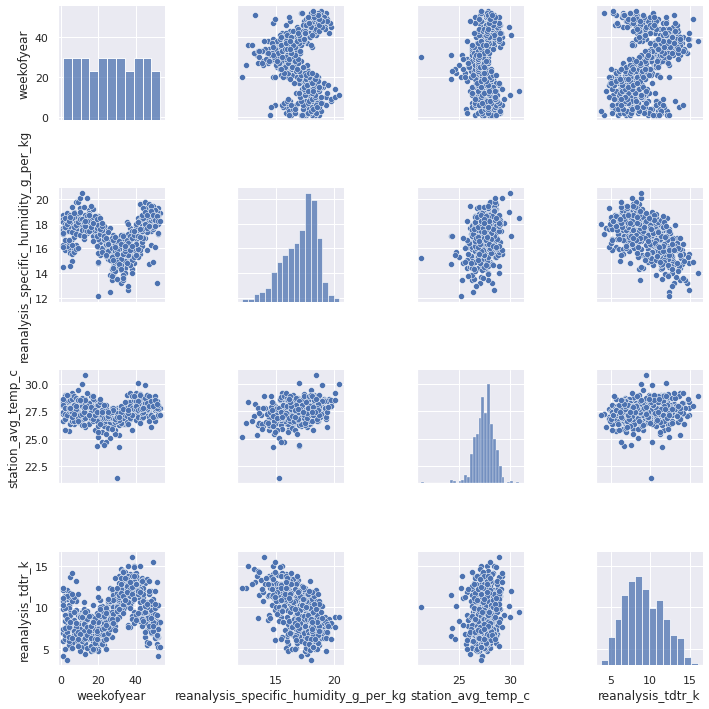

In [27]:
%matplotlib inline
sns.pairplot(train_iq[features]);

##### Apply Algorithm

In [28]:
model_iq = linear_model.LinearRegression()
model_iq.fit(X_train_iq, Y_train_iq)

pd.DataFrame({'Feature': features_iq, 'Coefficient': model_iq.coef_})

,Feature,Coefficient
0,weekofyear,0.000773
1,ndvi_sw,5.123620
2,reanalysis_specific_humidity_g_per_kg,1.319141
3,station_min_temp_c,0.822331


In [29]:
Y_prediction_iq = model_iq.predict(X_test_iq)

Y_iq = np.rint(Y_prediction_iq)
Y_iq = Y_iq.astype(int)
result_iq = np.hstack(Y_iq)

result_iq

array([ 8,  7,  9, -1,  2,  6,  2,  6,  4,  8,  7,  6,  7,  7,  5,  7,  7,
        9, 10,  8,  8,  9,  9, 10, 10,  6,  9,  7,  9,  8,  6,  7,  9,  9,
        9,  9,  9,  9,  9,  9, 10,  9,  8, 10, 10,  6,  8,  9,  8,  8,  9,
        6,  7,  7,  3,  6,  6,  6,  6,  4,  2,  2,  5,  6,  8,  9,  8,  9,
       11, 10,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,  9,  8,  8,  9, 10,
        9,  7,  7,  8,  8,  7,  8,  8, 11, 11, 10,  9,  5, 10,  6,  7,  6,
        3,  7,  5,  5,  4,  5,  1,  5,  2,  2,  7,  4,  5,  6,  5,  6,  4,
        9,  7, 10,  9,  9, 11, 12, 12, 10,  9, 11, 10,  7,  8, 10, 11, 11,
       10, 10, 10, 10, 10, 12, 10,  9,  9, 11, 10,  3, 11,  9,  9,  9,  9,
        7,  6,  7])

#### Result

In [30]:
final_result = np.append(result_sj, result_iq,axis=None)
final_result

array([26, 26, 29, 26, 29, 29, 33, 34, 36, 36, 36, 36, 39, 39, 43, 43, 44,
       46, 47, 49, 48, 49, 51, 48, 50, 50, 49, 52, 52, 53, 52, 48, 50, 53,
       52,  8,  9, 11, 13, 15, 13, 13, 12, 14, 15, 14, 14, 17, 16, 19, 20,
       22, 24, 24, 27, 28, 33, 32, 32, 34, 34, 35, 38, 38, 40, 41, 40, 42,
       43, 43, 45, 48, 46, 47, 49, 49, 51, 52, 50, 50, 53, 54, 56, 54, 55,
       56, 55, 56, 12, 13, 15, 14, 12, 13, 16, 17, 21, 21, 20, 23, 21, 19,
       21, 25, 29, 30, 28, 30, 32, 35, 35, 35, 38, 39, 40, 41, 42, 43, 42,
       43, 44, 45, 47, 47, 48, 47, 48, 50, 52, 50, 49, 52, 53, 50, 48, 49,
       46, 53, 53, 52,  8, 12, 13, 14, 13, 14, 14, 15, 11, 15, 12, 16, 21,
       23, 20, 22, 21, 26, 23, 30, 34, 33, 36, 39, 40, 39, 39, 40, 40, 41,
       42, 46, 45, 46, 47, 45, 47, 49, 49, 50, 50, 50, 49, 53, 53, 53, 53,
       54, 52, 54, 50, 52, 10, 11, 10, 11, 11, 13, 14, 15, 15, 17, 16, 16,
       19, 22, 22, 23, 22, 26, 27, 31, 31, 29, 33, 32, 33, 35, 36, 39, 38,
       40, 40, 42, 45, 43

#### Output

In [31]:
# generate output
output = pd.DataFrame({ 'city': test['city'], 'year': test['year'], 'weekofyear': test['weekofyear'], 'total_cases': final_result})

with open('result.csv', 'w') as f:
  output.to_csv(f,  index = False)
  

files.download('result.csv')

output.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,city,year,weekofyear,total_cases
0,sj,2008,18,26
1,sj,2008,19,26
2,sj,2008,20,29
3,sj,2008,21,26
4,sj,2008,22,29
